## EPS 88 Spr 23 Final Project - Ari Kosorukov

# Research Question / Goals
In week 8 of this class, we investigated data from the Mauna Loa Observatory in Hawaii showing rising atmospheric CO$_2$ levels. See the graph below, "Monthly CO2 concentration" which we made in the class notebook. 

Here is my research from that assignment explaining the periodic oscillation in the data:

These yearly fluctuations in atmospheric CO$_2$ levels are a function of Earth's carbon cycle, in which carbon moves from one reservior to another (in particular, the atmosphere as one reservoir and terrestrial plants as another). Yearly atmospheric CO$_2$ levels peak in May; this is because in Siberia spring arrives in May. In the winter, decomposers have been releasing CO$_2$ into the atmosphere that was locked in terrestrial plants. Thus within a year, atmospheric CO$_2$ levels are the highest right before terrestrial plants start growing up again, which happens in the spring. As spring arrives, plants abosrb CO2 from the atmosphere, reducing CO$_2$ levels and creating the annual fluctations.

The long-term trend (increase in CO$_2$ levels as a function of the human-time scale), is of anthropogenic nature, in other words, humans cause it (by burning CO$_2$-emitting fossil fuels). The current scientific research is confident that rising atmospheric CO$_2$ levels are anthropgenic, but differs in predictions on future atmospheric CO$_2$ levels (many different models and forecasts that take into account different human actions).
(NOAA and Scripps Insitutution of Oceanography)

Having grown up in a coastal wetland for a large portion of my life, I've studied much about the coastal ecosystem: their ecological importance for habitat, biodiversity, and the consequences to that by human development. **I am interested in investigating the environmental role of wetland environments on the atmosphere. Specifically, what can I discover about the relationship between atmospheric CO$_2$ levels and carbon sequestration in wetland environments?**


Background information on wetlands:

What is a wetland? "Wetlands are areas where water covers the soil, or is present either at or near the surface of the soil all year or for varying periods of time during the year, including during the growing season" (EPA, 2023). The EPA also says that there are two main categories of wetlands, coastal and inland (tidal vs. non-tidal). Coastal wetlands have environments with varying salinities due to their presence in estauries (areas were ocean water meets freshwater). On the other hand, inland wetlands can be found around rivers, lakes, and areas where groundwater/rainwater can sufficiently saturate the soil.


In [16]:
# import image module
from IPython.display import Image
  
# display image from Data folder
Image(url="Data/images/mauna_loa_graph.png", width=500, height=500)

# Dataset Description

The dataset I will be using in this research project, **"Coastal Wetland Elevation and Carbon Flux Inventory with Uncertainty"** is published by NASA's Oak Ridge National Laboratory (ORNL), located in Tennessee. This lab is in an interagency agreement between NASA and the Dept. of Energy; it specializes in "in data and information relevant to terrestrial biogeochemistry, ecology, and environmental processes, which are critical to understanding the dynamics of Earth's biological, geological, and chemical components." (NASA)


Specifically, this data set consists of annual maps, measures, and statistics the lab collected from 2006-2011 of oceanic coastal areas of the United States through landsat and literature review. Landsat is a NASA program that began in 1972, launching satellites into space to observe Earth by taking images. They images taken are at 30 m resolution, meaning each pixel is 30 meters wide, or the average size of a U.S. crop field (NASA, 2021) 

There are 12 primary data files in the set, covering various geographic and environmental data. (wetland types, elevation, tidal levels, atmospheric, etc.) File types are .tif, .cvs, and .zip. .tif is an image format

# Data Exploration
I will be investing the "coastal_wetland_downscaled_carbon_fluxes_2006_to_2011" csv file, which features data on computed estimated median soil, biomass, methane, and total CO2 equivalent annual fluxes, each with reported 95% confidence intervals, at 30 m resolution. 

In [17]:
# import the data using pandas
import pandas as pd
pd.set_option('display.max_colwidth', None)

coastal_data = pd.read_csv('Data/coastal_wetland_downscaled_carbon_fluxes_2006_to_2011.csv')

In [18]:
coastal_data.head()

,Value,Count,class,class_2006,class_2010,mapped_med,mapped_min,mapped_max,mapped_ci,estima_med,...,soil_max,soil_ci,bmass_med,bmass_min,bmass_max,bmass_ci,ch4_med,ch4_min,ch4_max,ch4_ci
0,39,3,High Intensity Developed to Palustrine Scrub/Shrub Wetland,High Intensity Developed,Palustrine Scrub/Shrub Wetland,2.0,1.0,2.0,1.0,2.611910,...,0.311142,0.110104,0.923596,0.402436,2.138336,1.735901,-0.282937,-0.688384,-0.115942,0.572442
1,40,19,High Intensity Developed to Palustrine Emergent Wetland,High Intensity Developed,Palustrine Emergent Wetland,13.0,12.0,15.0,3.0,20.940561,...,0.348298,0.125642,0.162032,0.142233,0.184572,0.042340,-0.315203,-0.766932,-0.129965,0.636968
2,41,3,High Intensity Developed to Estuarine Forested Wetland,High Intensity Developed,Estuarine Forested Wetland,3.0,3.0,3.0,0.0,3.907036,...,0.288570,0.105607,9.065147,7.128011,11.480116,4.352105,-0.168484,-0.285042,-0.055611,0.229431
3,42,1,High Intensity Developed to Estuarine Scrub/Shrub Wetland,High Intensity Developed,Estuarine Scrub/Shrub Wetland,1.0,1.0,1.0,0.0,1.109796,...,0.287731,0.149970,0.730951,0.303458,1.784197,1.480740,-0.143273,-0.271112,-0.046838,0.224275
4,43,363,High Intensity Developed to Estuarine Emergent Wetland,High Intensity Developed,Estuarine Emergent Wetland,363.0,363.0,363.0,0.0,482.907725,...,0.295088,0.103804,0.138222,0.122684,0.155478,0.032795,-0.174107,-0.292851,-0.056984,0.235867


In [19]:
# here I can see how many observations the csv contains, 201
coastal_data.shape

(201, 29)

In [20]:
# investigating the column names
# link to data documentation: https://daac.ornl.gov/CMS/guides/Uncertainty_US_Coastal_GHG.html
coastal_data.columns

Index(['Value', 'Count', 'class', 'class_2006', 'class_2010', 'mapped_med',
       'mapped_min', 'mapped_max', 'mapped_ci', 'estima_med', 'estima_min',
       'estima_max', 'estima_ci', 'total_med', 'total_min', 'total_max',
       'total_ci', 'soil_med', 'soil_min', 'soil_max', 'soil_ci', 'bmass_med',
       'bmass_min', 'bmass_max', 'bmass_ci', 'ch4_med', 'ch4_min', 'ch4_max',
       'ch4_ci'],
      dtype='object')

In [21]:
# Using the info from the data documentation,
# I made a csv to easily investigate the column names, units, and descriptions.

column_descriptions = pd.read_csv('Data/column_descriptions.csv')

column_descriptions.head()

,Column name,Units,Description
0,Value,integer,value corresponding to land cover class or change type
1,Count,integer,pixel count for this product
2,class,character,Coastal Change Analysis Program (C-CAP) change class from 2006 to 2010/11
3,class_2006,character,C-CAP 2006 land cover class
4,class_2010,character,C-CAP 2010/11 land cover class


In [22]:
# I made a function for easy access of column descriptions/units
def col_descrip_func(column_name):
    '''Takes in a column, prints the description and units of it'''
    print(column_descriptions.loc[column_descriptions['Column name'] == column_name]['Description'])
    print(column_descriptions.loc[column_descriptions['Column name'] == column_name]['Units'])

In [23]:
col_descrip_func('Value')

0    value corresponding to land cover class or change type
Name: Description, dtype: object
0    integer
Name: Units, dtype: object


In [24]:
col_descrip_func('total_med')

13    median total flux
Name: Description, dtype: object
13    tonnes CO2e/year/pixel
Name: Units, dtype: object


# Data Visualizations
Use at least three different types of data visualizations plots that are ones we used throughout the course.

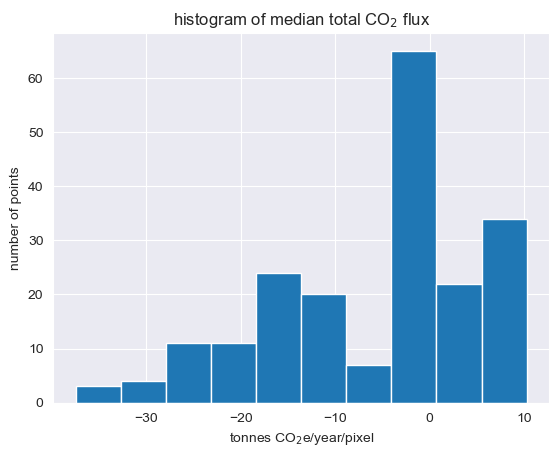

In [25]:
# creating plots for visuals
import matplotlib.pyplot as plt

plt.hist(coastal_data['total_med'],label= 'median total CO$_2$e flux')
plt.xlabel('tonnes CO$_2$e/year/pixel')
plt.ylabel('number of points')
plt.title('histogram of median total CO$_2$ flux')
plt.show()

I explain this histogram as showing the annual change in greenhouse gas emissions. We can see that most of the flux is negative or close to zero, meaning that CO$_2$e uptake is occuring (wetland presumably acting as a carbon sink) or there is no flux. There is still a large amount of positive flux, indicating CO$_2$e emission.

In [26]:
# display the different types of wetlands the dataset
print(coastal_data['class_2010'].unique())

['Palustrine Scrub/Shrub Wetland' 'Palustrine Emergent Wetland'
 'Estuarine Forested Wetland' 'Estuarine Scrub/Shrub Wetland'
 'Estuarine Emergent Wetland' 'Palustrine Forested Wetland'
 'High Intensity Developed' 'Medium Intensity Developed'
 'Low Intensity Developed' 'Developed Open Space' 'Cultivated'
 'Pasture/Hay' 'Grassland' 'Deciduous Forest' 'Evergreen Forest'
 'Mixed Forest' 'Scrub/Shrub' 'Unconsolidated Shore' 'Bare Land' 'Water'
 'Palustrine Aquatic Bed' 'Estuarine Aquatic Bed']


In [27]:
coastal_data.groupby(by = 'class_2010').size()

class_2010
Bare Land                          6
Cultivated                         5
Deciduous Forest                   3
Developed Open Space               6
Estuarine Aquatic Bed              6
Estuarine Emergent Wetland        22
Estuarine Forested Wetland        12
Estuarine Scrub/Shrub Wetland     20
Evergreen Forest                   6
Grassland                          6
High Intensity Developed           6
Low Intensity Developed            6
Medium Intensity Developed         6
Mixed Forest                       3
Palustrine Aquatic Bed             3
Palustrine Emergent Wetland       22
Palustrine Forested Wetland       19
Palustrine Scrub/Shrub Wetland    21
Pasture/Hay                        5
Scrub/Shrub                        6
Unconsolidated Shore               6
Water                              6
dtype: int64

In [28]:
# making some new dataframes based on a column (see more in graph description below)
coastal_data_palustrine = coastal_data[coastal_data['class_2010'].str.startswith('Pal')]
coastal_data_estuarine = coastal_data[coastal_data['class_2010'].str.startswith('Est')]
coastal_data_forest = coastal_data[coastal_data['class_2010'].str.startswith('Deci')]

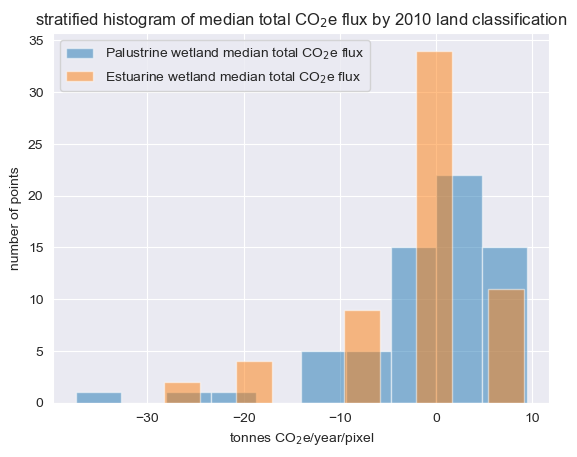

In [29]:
plt.hist(coastal_data_palustrine['total_med'],label= 'Palustrine wetland median total CO$_2$e flux',
         alpha = 0.5)
plt.hist(coastal_data_estuarine['total_med'],label= 'Estuarine wetland median total CO$_2$e flux', 
         alpha = 0.5)
#plt.hist(coastal_data_high_dev['total_med'],label= 'Deciduous Forest median total CO$_2$e flux',
 #       color = 'red', alpha = 0.5)

plt.xlabel('tonnes CO$_2$e/year/pixel')
plt.ylabel('number of points')
plt.title('stratified histogram of median total CO$_2$e flux by 2010 land classification')
plt.legend()
plt.show()

For this visualization, I created some new dataframes filtered based on the column 'class_2010'. See what it means below. I was interested in seeing if there is a difference between CO$_2$e flux for palustrine vs. estuarine wetlands. 

Queensland gov says, "Palustrine wetlands are what many people traditionally think of as a wetland— they are vegetated, non-riverine or non-channel systems ocean-derived salinity of less than 0.5%"

From my mywaterquality.ca.gov: "Estuarine wetlands form along the tidal reaches of rivers and streams, and along the margins of estuarine bays and straits."

Based on the distributions in the histogram, they both are left-skewed and have centers around 0.


In [30]:
col_descrip_func('class_2010')

4    C-CAP 2010/11 land cover class
Name: Description, dtype: object
4    character
Name: Units, dtype: object


For my third visualization, I will do something fun: a bivariant kernel density plot. Is there a relationship between CO$_2$e flux and CH$_4$ flux?

In [31]:
# interesting to note how this dataset seems to use tonnes CO$_2$e/year/pixel as a common unit
col_descrip_func('ch4_med')

25    median methane flux
Name: Description, dtype: object
25    tonnes CO2e/year/pixel
Name: Units, dtype: object


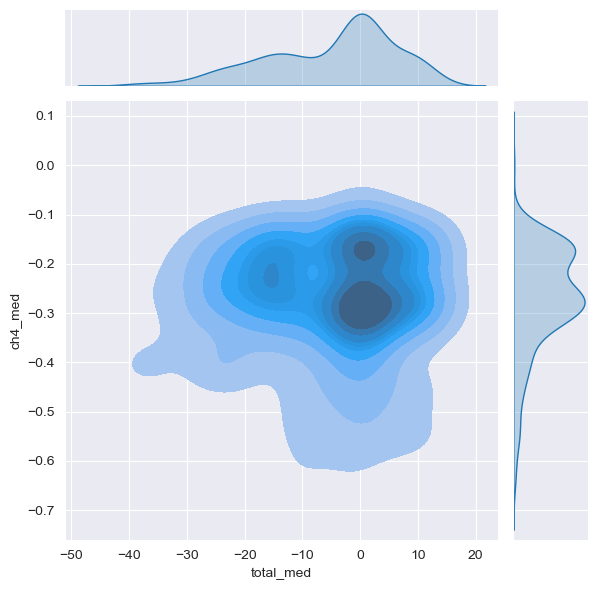

In [32]:
# another visualization library
import seaborn as sns

sns.jointplot(x=coastal_data['total_med'], 
              y=coastal_data['ch4_med'],
              kind='kde',
              joint_kws={'fill': True})
plt.show()

# Title: 'CH$_4$ and CO$_2$ flux in tonnes CO$_2$e/year/pixel'

Interpretation: Both metrics look to be centered a little bit below 0 tonnes CO$_2$e/year/pixel. Based on this data it seems that the most common outcome is not very much flux to be occruing in either positive or negative (uptake/emissions of CO$_2$e).

# Use at two different data analysis methods/approaches that you utilized in the course.

# A/B Testing

Null hypothesis: The population distribution of median CO$_2$e flux of Palustrine Forested Wetlands is the same for estuarine forested wetlands. The difference in the sample is due to chance.

Alternative hypothesis: The population distribution of median CO$_2$e flux of Palustrine Forested Wetlands is not the same for estuarine forested wetlands.

In [33]:
# from week 11 in-class notebook
def difference_of_means(dataframe, value, category_column, category_values):
    """
    Calculate the difference between the means of two categories in a given dataframe.
    
    Parameters
    ----------
    dataframe : pandas.DataFrame
        The input dataframe containing the data.
    value : str
        The column name for which the mean will be calculated.
    category_column : str
        The column name that will be used to categorize the data.
    category_values : list of str
        A list containing two distinct values of the category_column used to separate the data into two groups.
        
    Returns
    -------
    float
        The difference between the means of the two categories.
    """
    mean_1 = np.mean(dataframe[dataframe[category_column] == category_values[0]][value])
    mean_2 = np.mean(dataframe[dataframe[category_column] == category_values[1]][value])
    return mean_1 - mean_2

In [34]:
import numpy as np

coastal_data_palustrine_forested = coastal_data[coastal_data['class_2010'] == 
                                                'Palustrine Forested Wetland']
coastal_data_estuarine_forested = coastal_data[coastal_data['class_2010'] == 
                                               'Estuarine Forested Wetland']

palustrine_mean = np.mean(coastal_data_palustrine_forested['total_med'])
estuarine_mean = np.mean(coastal_data_estuarine_forested['total_med'])

observed_diff = palustrine_mean - estuarine_mean
print(palustrine_mean, estuarine_mean)
print(observed_diff)
# interesting observation here. The carbon flux is positive for both of the forested wetlands!

7.238277823736843 8.198999068500001
-0.9607212447631577


In [35]:
# one random permutation
coastal_combined = coastal_data_palustrine_forested.append(coastal_data_estuarine_forested)
coastal_combined['WETLAND_Shuffled'] = np.random.permutation(coastal_combined['class_2010'].values)
difference_of_means(coastal_combined,'total_med','WETLAND_Shuffled',
                    ['Palustrine Forested Wetland','Estuarine Forested Wetland'])

C:\Users\Ari\AppData\Local\Temp\ipykernel_10580\3007787808.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coastal_combined = coastal_data_palustrine_forested.append(coastal_data_estuarine_forested)


0.026809326021925983

Text(0.5, 0, 'CO$_2$e flux mean difference')

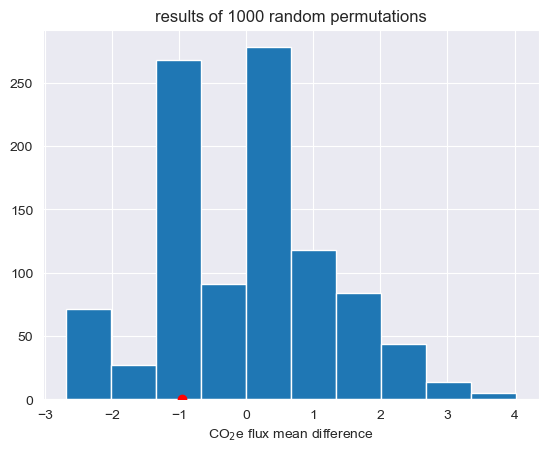

In [36]:
# 1000 random permutations
shuffled_pal_est_mean = []

repetitions = 1000

for i in np.arange(repetitions):
    coastal_combined['WETLAND_Shuffled'] = np.random.permutation(coastal_combined['class_2010'].values)
    
    new_mean_diff = difference_of_means(coastal_combined,'total_med',
                                        'WETLAND_Shuffled',
                                        ['Palustrine Forested Wetland','Estuarine Forested Wetland'])
    shuffled_pal_est_mean.append(new_mean_diff) 

plt.title('results of 1000 random permutations')
plt.hist(shuffled_pal_est_mean,label='permutations')
plt.scatter(observed_diff,0,color='red',zorder=1000,label='observed diff')
plt.xlabel('CO$_2$e flux mean difference')

In [44]:
# p-val calculation:
shuffled_pal_est_mean_array = np.array(shuffled_pal_est_mean)

mean_empirical_p = np.count_nonzero(shuffled_pal_est_mean_array >= observed_diff) / repetitions
mean_empirical_p

0.652

Because the p-value of 0.652 is greater than a 0.05 or 0.1 cut-off, there isn't statistical significance that there is difference between the mean CO$_2$ flux of paulustrine and estuarine ecosystems.

# Classification attempt
Interested in investigating whether carbon dioxide or methane flux can predict wetland type for palustrine and estuarine wetlands.

C:\Users\Ari\AppData\Local\Temp\ipykernel_10580\2151422742.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  palustrine_estuarine = coastal_data_palustrine.append(coastal_data_estuarine)


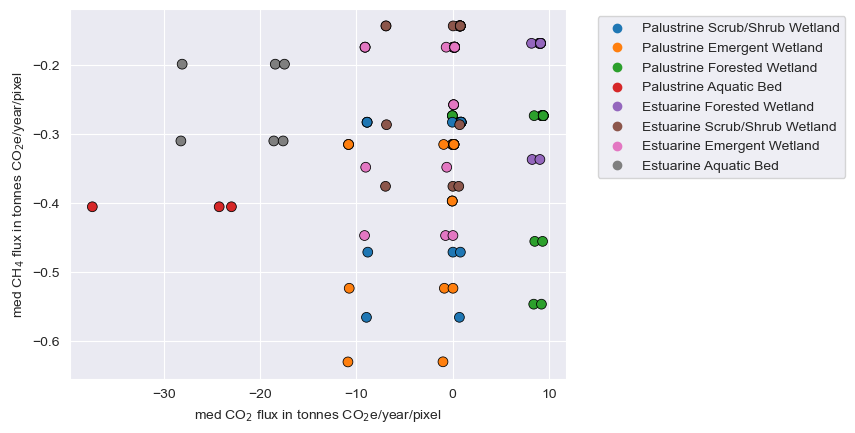

In [38]:
# Create a scatter plot colored by 'class_2010' (land type)
palustrine_estuarine = coastal_data_palustrine.append(coastal_data_estuarine)
sns.scatterplot(data=palustrine_estuarine, x= 'total_med', y='ch4_med', hue='class_2010', edgecolor='k', s=50)

# Add a legend
#plt.legend(title="land type")

# Label the axes
plt.xlabel('med CO$_2$ flux in tonnes CO$_2$e/year/pixel')
plt.ylabel('med CH$_4$ flux in tonnes CO$_2$e/year/pixel')

# helpful code snippet for moving legend
# source: https://www.geeksforgeeks.org/how-to-place-legend-outside-of-the-plot-in-matplotlib/
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [39]:
from sklearn.svm import SVC
classifier_svc_linear = SVC(kernel='linear')

# necessary features and target variable
X = palustrine_estuarine[['total_med', 'ch4_med']]
y = palustrine_estuarine['class_2010']

from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [40]:
# training & testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

print(len(X_train))
print(len(X_test))

87
38


In [41]:
classifier_svc_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [42]:
# Make predictions on the test set
y_pred = classifier_svc_linear.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.23684210526315788


Wow! Terrible accuracy. Some thoughts: the dataset I used was really small. I looked only into palustrine and estuarine wetlands. Will try with all land types:

In [43]:
classifier_svc_linear2 = SVC(kernel='linear')

# necessary features and target variable
X_2 = coastal_data[['total_med', 'ch4_med']]
y_2 = coastal_data['class_2010']

# encode target variable
y_2_encoded = le.fit_transform(y_2)

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2_encoded,
                                                            test_size=0.3, random_state=42)
print(len(X_2_train))
print(len(X_2_test))

classifier_svc_linear2.fit(X_2_train, y_2_train)

# Make predictions on the test set
y_2_pred = classifier_svc_linear2.predict(X_2_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_2_test, y_2_pred))

140
61
Accuracy: 0.13114754098360656


It did even worse! The amount of data points did not increase by that much when adding in all land types (small data file). And the diversity of land types (there are 22 different land classifications) is really large in this dataset. This seems to have added in more confusion of sorts to the model leading to the lower accuracy.

# Conclusion

   My results from analysis of this dataset showed that wetland environments have both positive and negative carbon flux. Particularly looking at some of the earlier visualizations in my project, such as the histograms, I was able to show that wetland environments have this varying flux. On the other hand, a forest environment such as the Deciduous Forest land classification, only had very negative flux. This challenged my prior (limited) knowledge that wetlands serve solely as carbon sinks. As environmental space in the carbon cycle, carbon is both in uptake and efflux.
   
   In creating the visualizations and investigating the column descriptions/units, I came across the CO$_2$e metric which was knew to me, so I researched it. EPA defines Carbon dioxide equivalent or CO$_2$e as "the number of metric tons of CO$_2$ emissions with the same global warming potential as one metric ton of another greenhouse gas." Flux is a continiuous change, in this dataset the 'temporal resolution' is annual. 
   
   I also learned what the difference between palustrine and estuarine wetlands are, mainly their proximity to an ocean and salinity content are the differentiating factor. After making a stratified histogram of their CO$_2$ flux, I decided to run A/B testing to see if the difference in flux was signficant. The p-value from a 1000 permutation random shuffling test was not significant (0.668) which lead me in failing to reject the null, that the population distribution of median CO$_2$e flux of Palustrine Forested Wetlands is the same for estuarine forested wetlands. The difference in the sample is due to chance.
    Another data analysis method I tried to run was a classifcation model. I was interested in seeing whether CO$_2$e and CH$_4$ flux could predict land type. The model accuracies for palustrine/estuarine wetlands was about 23% and 13% for all land types. My reasonsing behind this is that there were many diverse land types in the dataset (22 ranging from forests, wetlands, to bare land) and not enough datapoints for some categories. 
    
   I also did some final research to compare the results of my analysis on this dataset to already published papers and sources. In the journal Landscape Ecology, the article *Wetlands, carbon, and climate change* measured soil core extracts and ran models, concluding "Most wetlands are net carbon sinks and not radiative sources of climate change, even when methane emissions are considered, when taking into account the decay of methane in the atmosphere" (Mitsch et al., 2012). The National Oceanic and Atmospheric Administration explains what "blue carbon" is: it is "the carbon captured by living coastal and marine organisms and stored in coastal ecosystems" (NOAA, 2022). NOAA explains that wetlands are very good carbon sinks because of their anaerobic soils. Soil with a low oxygen content allows plant remaisn to stay intact and not decompose as quickly.
    
  In conclusion, I learned a few things in doing this project. It is really helpful to be knowledgeable of the size and contents of the dataset you are working with. I was apprehensive about the size of the dataset and that perhaps hindered the classification aspect of the analysis, but was still fruitful in visualizing subsets of the sample. Knowing how to make a variety of visualizations was really helpful in discovering what I would want to investiage later on in the project. I was proud of my creativity in designing a small function that provided the column descriptions/units of the main dataframe's columns when given a specific column name. This was actually useful throughout the entire project. Overall it was an awesome experience looking into a specific dataset and learning about it!

# Works cited 

"About Landsat." NASA, www.nasa.gov/mission_pages/landsat/overview/index.html.

"About ORNL DAAC." ORNL DAAC, www.earthdata.nasa.gov/eosdis/daacs/ornl.

Bridgham, Scott D., et al. "From Sedge Fen to Fen Meadow: A Conceptual Model of Peatland Succession in the Boreal Region Based on the Ecology of Fens." Landscape Ecology, vol. 28, no. 8, 2013, pp. 1463-1480.

"Coastal Blue Carbon." NOAA National Ocean Service, oceanservice.noaa.gov/ecosystems/coastal-blue-carbon/.

"Estuarine Wetlands." California State Water Resources Control Board, mywaterquality.ca.gov/eco_health/wetlands/extent/types/estuarine.html.

"Key Indicators of Climate Change: Carbon Dioxide Concentration." NOAA Global Monitoring Laboratory, gml.noaa.gov/ccgg/trends/.

"Palustrine Wetlands: Conductivity." Queensland Wetlands Program, wetlandinfo.des.qld.gov.au/wetlands/management/pressures/lacustrine-palustrine-threats/conductivity/state.html.

Swanson-Hysell, Nicholas. "Weeks 11 and 12 In-class assignments"

"What is a Wetland?" US Environmental Protection Agency, www.epa.gov/wetlands/what-wetland.

"Why Does Atmospheric CO2 Peak in May?" Keeling Curve, 4 June 2013, keelingcurve.ucsd.edu/2013/06/04/why-does-atmospheric-co2-peak-in-may/.